In [1]:
#importing basic libraries
import numpy as np
import matplotlib.pyplot as plt
import random as rand

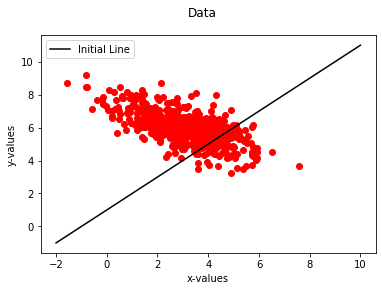

In [30]:
data = np.load("data-2class-Copy1.npz")                  #loading data
d = data['d']                                 
l = data['l']
dataNew=[]
for i in range(0,len(d),1):
    if(l[i]==1):
        dataNew.append(d[i])
                                                         #extracting useful data
data=np.array(dataNew)
plt.scatter(data[:,0],data[:,1],color='red')             #plotting data
plt.xlabel("x-values")
plt.ylabel("y-values")
plt.suptitle("Data")

x=np.linspace(-2,10)
plt.plot(x,x+1,label="Initial Line",color="black")      #line with m=1,c=1
plt.legend()

In [26]:

def calError(data,m,c):                               #code to calculate error
    errorSum=0
    for i in range(0,len(data),1):
        ypred=m*data[i][0]+c                         #substitute x-value to calculate Ypredicted
        ytrue=data[i][1]                             #given y-value is the actual y-value
        errorSum=errorSum+(ypred-ytrue)**2           
    return errorSum/len(data)                        #implementation of error formula

def grad(data,m,c):                                 #code to calculate gradient w.r.t. 'm' and 'c'
    gradm=0
    gradc=0
    for i in range(0,len(data),1):
        ypred=m*data[i][0]+c
        ytrue=data[i][1]
        error=(ypred-ytrue)
        gradm=gradm+error*data[i][0]
        gradc=gradc+error                          #implementing formulas of the gradients.
    return (2*gradm)/len(data),(2*gradc)/len(data)


def gradDesc(data,m,c,eeta):                       #deploying batch gradient descent
    egraph=[]
    for i in range(0,1000,1):
        error=calError(data,m,c)
        delM,delC=grad(data,m,c)
        m=m-eeta*delM
        c=c-eeta*delC                              #updating parameters to optimized values
        iterationError=[]
        iterationError.append(i)
        iterationError.append(error)
        egraph.append(iterationError)              #storing iteration and error to plot evolution of error
    return m,c,egraph

Text(0.5, 0.98, 'Evolution of error')

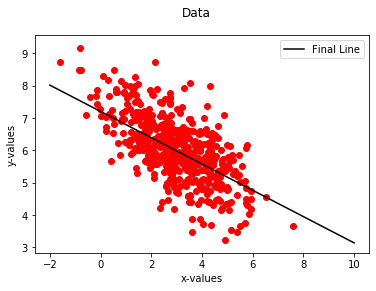

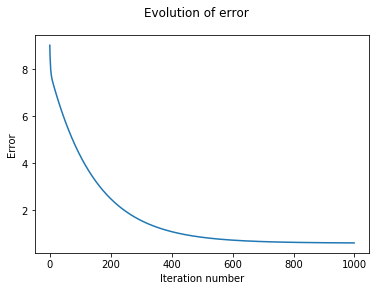

In [33]:
initm=1.
initc=1.
m,c,graph=gradDesc(data,initm,initc,0.01)
graph=np.array(graph)

x=np.linspace(-2,10,100)
y=m*x+c
fig1=plt.figure(1)
plt.plot(x,y,color="black",label="Final Line")
plt.scatter(data[:,0],data[:,1],color='red')
plt.xlabel("x-values")
plt.ylabel("y-values")
plt.suptitle("Data")
plt.legend()
fig2=plt.figure(2)
plt.plot(graph[:,0],graph[:,1])
plt.xlabel("Iteration number")
plt.ylabel("Error")
plt.suptitle("Evolution of error")
